In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [2]:
# pAnnData.suggest_obs_from_file(source="pd_prot.txt", source_type='pd')
pAnnData.suggest_obs_from_file(source="diann.sc.report.tsv", source_type='diann')

Auto-detecting '_' as delimiter.

From filename: 20240913_Aur60minDIA_Embryo_d5_100cells_A5
Suggested .obs columns:
  date                      : 20240913
  gradient OR acquisition   : Aur60minDIA
  sample_type               : Embryo
  unknown??                 : d5
  amount                    : 100cells
  unknown??                 : A5

⚠️  Multiple matched token(s): ['Aur60minDIA']
⚠️  Unrecognized token(s): ['d5', 'A5']
Please manually label these.

ℹ️ Suggested obs:
obs_columns = ['date', 'gradient', 'sample_type', '<d5?>', 'amount', '<A5?>']


In [ ]:
obs_columns = ['date', 'gradient', 'sample_type', 'stage', 'amount', 'well_position']

pdata_embryo = pAnnData.import_data(source_type='diann',report_file="diann.sc.report.tsv",obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Source file: diann.sc.report.tsv
Number of files: 309
Proteins: 4509
Peptides: 44756

🔍 12 proteins with missing gene names. Querying UniProt...
✅ Recovered 3 gene names from UniProt.
⚠️ 9 gene names still missing. Assigned as 'UNKNOWN_<accession>' for:
    Q9D937, Q3U6N9, Q8R3Y5, Q80WR5, Q91WD4...
💡 You can update these using `pdata.update_identifier_maps({'GENE': 'ACCESSION'}, on='protein', direction='reverse', overwrite=True)`

ℹ️  RS matrix: (4509, 44756) (proteins × peptides), sparsity: 99.98%
   - Proteins with ≥2 *unique* linked peptides: 3789/4509
   - Peptides linked to ≥2 proteins: 0/44756
   - Mean peptides per protein: 9.93
   - Mean proteins per peptide: 1.00
✅ pAnnData object is valid.
--------------------------
✅ Import complete. Use `print(pdata)` to view the object.


In [4]:
pdata_embryo.summary

,date,gradient,sample_type,stage,amount,well_position,protein_quant,protein_count,protein_abundance_sum,peptide_quant,peptide_count,peptide_abundance_sum,unique_pep2_protein_count
20240913_Aur60minDIA_Embryo_d5_100cells_A5,20240913,Aur60minDIA,Embryo,d5,100cells,A5,0.898869,4053,2.838454e+07,0.610265,27313,1.176690e+08,3607
20240913_Aur60minDIA_Embryo_d5_100cells_A6,20240913,Aur60minDIA,Embryo,d5,100cells,A6,0.899534,4056,2.772702e+07,0.619917,27745,1.172310e+08,3600
20240913_Aur60minDIA_Embryo_d5_100cells_A1,20240913,Aur60minDIA,Embryo,d5,100cells,A1,0.897538,4047,2.875839e+07,0.614599,27507,1.206943e+08,3595
20240913_Aur60minDIA_Embryo_d5_100cells_A2,20240913,Aur60minDIA,Embryo,d5,100cells,A2,0.886893,3999,2.884262e+07,0.602221,26953,1.216962e+08,3569
20240913_Aur60minDIA_Embryo_d5_100cells_A3,20240913,Aur60minDIA,Embryo,d5,100cells,A3,0.860945,3882,3.002017e+07,0.571275,25568,1.180292e+08,3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241010_Aur60minDIA_Embryo_d6_sc_J11,20241010,Aur60minDIA,Embryo,d6,sc,J11,0.003105,14,2.006392e+10,0.000492,22,1.047986e+10,14
20241010_Aur60minDIA_Embryo_d6_sc_J5,20241010,Aur60minDIA,Embryo,d6,sc,J5,0.001331,6,5.704773e+08,0.000201,9,3.619662e+08,5
20241010_Aur60minDIA_Embryo_d6_sc_I12,20241010,Aur60minDIA,Embryo,d6,sc,I12,0.002883,13,6.953405e+07,0.000715,32,8.798255e+07,12
20241010_Aur60minDIA_Embryo_d6_sc_I4,20241010,Aur60minDIA,Embryo,d6,sc,I4,0.003770,17,8.138947e+07,0.000782,35,8.745545e+07,16


In [7]:
print(pdata_embryo.summary.stage.value_counts())

print(pdata_embryo.summary.amount.value_counts())

stage
d5    165
d6    144
Name: count, dtype: int64
amount
sc          279
10cells      20
100cells     10
Name: count, dtype: int64


In [22]:
# defining color palette

# Define base hues for each stage
base_hues = {
    'd5': sns.color_palette("Blues", 9)[5],   # Blue for d5
    'd6': sns.color_palette("Purples", 9)[5]  # Purple for d6
}

# Amounts in light → dark order
amounts = ['sc', '10cells', '100cells']
full_palette = {}

for stage, base_color in base_hues.items():
    # Blend from a light version of base_color to base_color itself
    light_base = tuple(0.4 * c + 0.6 * 1.0 for c in base_color)  # blend 80% base_color, 20% white
    shades = sns.blend_palette([light_base, base_color], n_colors=len(amounts))
    for i, amount in enumerate(amounts):
        full_palette[f"{stage}_{amount}"] = shades[i]

In [11]:
# plot from summary table

# Prepare the DataFrame
df = pdata_embryo.summary.copy()
df['stage'] = df['stage'].astype(str)
df['amount'] = df['amount'].astype(str)
df['label'] = df['stage'] + '_' + df['amount']  # e.g., 'AS_kd'


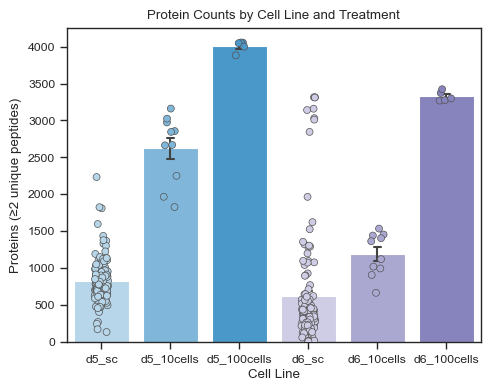

In [35]:
# Start the plot
plt.figure(figsize=(5, 4))

order = ['d5_sc', 'd5_10cells', 'd5_100cells', 'd6_sc', 'd6_10cells', 'd6_100cells']

# Barplot (means with SE)
sns.barplot(data=df, x='label', y='protein_count', hue='label', errorbar='se', palette=full_palette, capsize=0.1, errwidth=1.5, order=order,saturation=1)

# Overlay individual points
sns.stripplot(data=df, x='label', y='protein_count', hue='label', dodge=False, palette=full_palette, edgecolor='gray', linewidth=0.5)

# Labels and layout
plt.ylabel('Proteins (≥2 unique peptides)')
plt.xlabel('Cell Line')
plt.title('Protein Counts by Cell Line and Treatment')
plt.tight_layout()
plt.show()

<Axes: xlabel='label', ylabel='protein_count'>

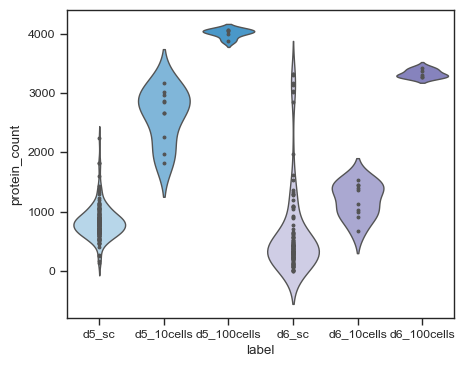

In [32]:
# inner_kws=dict(box_width=15, whis_width=2, color=".8")
# Start the plot
plt.figure(figsize=(5, 4))
sns.violinplot(data=df, x="label", y="protein_count", hue="label", inner="point", palette=full_palette, order=order, saturation=1)

In [4]:
pdata_sc = pdata_embryo.filter_sample(condition='amount == "sc"', debug=True)

self.prot id: 1202207126992
pdata.prot id: 1201584572368
Length of pdata.prot.obs_names: 309
`amount` == "sc"
Returning a copy of data based on sample condition: amount == "sc". Number of samples kept: 279.
Length of index_filter: 279
Length of pdata.prot.obs_names: 309
Number of shared samples: 279
Returning a copy of data based on sample condition: amount == "sc". Number of samples kept: 279.


Returning a copy of data based on sample condition: amount == "sc". Number of samples kept: 279.


<Axes: xlabel='stage', ylabel='protein_count'>

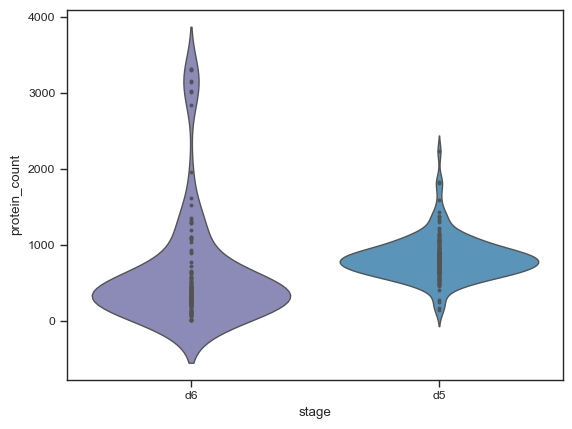

In [ ]:
sns.violinplot(data=pdata_sc.summary, x="stage", y="protein_count", hue="stage", inner="point", palette=base_hues)

In [5]:
pdata_sc.summary

,date,gradient,sample_type,stage,amount,well_position,protein_quant,protein_count,protein_abundance_sum,peptide_quant,peptide_count,peptide_abundance_sum,unique_pep2_protein_count
20241005_Aur60minDIA_Embryo_d6_sc_A13,20241005,Aur60minDIA,Embryo,d6,sc,A13,0.700599,3159,2.755133e+07,0.475512,21282,1.203129e+08,2998
20241005_Aur60minDIA_Embryo_d6_sc_A12,20241005,Aur60minDIA,Embryo,d6,sc,A12,0.734974,3314,2.902474e+07,0.507932,22733,1.257551e+08,3108
20241005_Aur60minDIA_Embryo_d6_sc_B10,20241005,Aur60minDIA,Embryo,d6,sc,B10,0.435795,1965,3.630482e+07,0.222473,9957,1.145477e+08,1926
20241005_Aur60minDIA_Embryo_d6_sc_C8,20241005,Aur60minDIA,Embryo,d6,sc,C8,0.359947,1623,3.410342e+07,0.169966,7607,1.067103e+08,1591
20241005_Aur60minDIA_Embryo_d6_sc_C11,20241005,Aur60minDIA,Embryo,d6,sc,C11,0.231093,1042,4.948331e+07,0.086044,3851,1.122885e+08,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241010_Aur60minDIA_Embryo_d6_sc_J11,20241010,Aur60minDIA,Embryo,d6,sc,J11,0.003105,14,2.006392e+10,0.000492,22,1.047986e+10,14
20241010_Aur60minDIA_Embryo_d6_sc_J5,20241010,Aur60minDIA,Embryo,d6,sc,J5,0.001331,6,5.704773e+08,0.000201,9,3.619662e+08,5
20241010_Aur60minDIA_Embryo_d6_sc_I12,20241010,Aur60minDIA,Embryo,d6,sc,I12,0.002883,13,6.953405e+07,0.000715,32,8.798255e+07,12
20241010_Aur60minDIA_Embryo_d6_sc_I4,20241010,Aur60minDIA,Embryo,d6,sc,I4,0.003770,17,8.138947e+07,0.000782,35,8.745545e+07,16


In [7]:
pdata_2000 = pdata_sc.filter_sample(min_prot=2000)
pdata_2000.summary

Returning a copy of data based on sample condition: protein_count >= 2000. Number of samples kept: 9.


,date,gradient,sample_type,stage,amount,well_position,protein_quant,protein_count,protein_abundance_sum,peptide_quant,peptide_count,peptide_abundance_sum,unique_pep2_protein_count
20241005_Aur60minDIA_Embryo_d6_sc_A13,20241005,Aur60minDIA,Embryo,d6,sc,A13,0.700599,3159,2.755133e+07,0.475512,21282,1.203129e+08,2998
20241005_Aur60minDIA_Embryo_d6_sc_A12,20241005,Aur60minDIA,Embryo,d6,sc,A12,0.734974,3314,2.902474e+07,0.507932,22733,1.257551e+08,3108
20241005_Aur60minDIA_Embryo_d6_sc_A7,20241005,Aur60minDIA,Embryo,d6,sc,A7,0.734974,3314,2.799295e+07,0.501363,22439,1.205556e+08,3113
20241005_Aur60minDIA_Embryo_d6_sc_A8,20241005,Aur60minDIA,Embryo,d6,sc,A8,0.734087,3310,2.660975e+07,0.512132,22921,1.214499e+08,3106
20241005_Aur60minDIA_Embryo_d6_sc_A11,20241005,Aur60minDIA,Embryo,d6,sc,A11,0.672211,3031,2.671695e+07,0.422178,18895,1.392260e+08,2899
20241005_Aur60minDIA_Embryo_d6_sc_A9,20241005,Aur60minDIA,Embryo,d6,sc,A9,0.696607,3141,2.797501e+07,0.444767,19906,1.225266e+08,2997
20241005_Aur60minDIA_Embryo_d6_sc_A10,20241005,Aur60minDIA,Embryo,d6,sc,A10,0.667776,3011,2.890848e+07,0.414782,18564,1.138267e+08,2892
20241005_Aur60minDIA_Embryo_d6_sc_A14,20241005,Aur60minDIA,Embryo,d6,sc,A14,0.630960,2845,2.724501e+07,0.370341,16575,1.090584e+08,2735
20240926_Aur60minDIA_Embryo_d5_sc_D5,20240926,Aur60minDIA,Embryo,d5,sc,D5,0.495232,2233,4.951885e+07,0.249464,11165,1.627260e+08,2146


In [8]:
pdata_weird = pdata_sc.filter_sample(min_prot=2500, debug=False)

pdata_weird.summary

Returning a copy of data based on sample condition: protein_count >= 2500. Number of samples kept: 8.


,date,gradient,sample_type,stage,amount,well_position,protein_quant,protein_count,protein_abundance_sum,peptide_quant,peptide_count,peptide_abundance_sum,unique_pep2_protein_count
20241005_Aur60minDIA_Embryo_d6_sc_A13,20241005,Aur60minDIA,Embryo,d6,sc,A13,0.700599,3159,2.755133e+07,0.475512,21282,1.203129e+08,2998
20241005_Aur60minDIA_Embryo_d6_sc_A12,20241005,Aur60minDIA,Embryo,d6,sc,A12,0.734974,3314,2.902474e+07,0.507932,22733,1.257551e+08,3108
20241005_Aur60minDIA_Embryo_d6_sc_A7,20241005,Aur60minDIA,Embryo,d6,sc,A7,0.734974,3314,2.799295e+07,0.501363,22439,1.205556e+08,3113
20241005_Aur60minDIA_Embryo_d6_sc_A8,20241005,Aur60minDIA,Embryo,d6,sc,A8,0.734087,3310,2.660975e+07,0.512132,22921,1.214499e+08,3106
20241005_Aur60minDIA_Embryo_d6_sc_A11,20241005,Aur60minDIA,Embryo,d6,sc,A11,0.672211,3031,2.671695e+07,0.422178,18895,1.392260e+08,2899
20241005_Aur60minDIA_Embryo_d6_sc_A9,20241005,Aur60minDIA,Embryo,d6,sc,A9,0.696607,3141,2.797501e+07,0.444767,19906,1.225266e+08,2997
20241005_Aur60minDIA_Embryo_d6_sc_A10,20241005,Aur60minDIA,Embryo,d6,sc,A10,0.667776,3011,2.890848e+07,0.414782,18564,1.138267e+08,2892
20241005_Aur60minDIA_Embryo_d6_sc_A14,20241005,Aur60minDIA,Embryo,d6,sc,A14,0.630960,2845,2.724501e+07,0.370341,16575,1.090584e+08,2735


In [ ]:
# calculate qc metrics
# version for protein
# membrane proteins
pdata_nb.prot.var["membrane"] = pdata_nb.prot.var.Description.str.contains("membrane", case=False)
# crapome?

sc.pp.calculate_qc_metrics(
    pdata_nb.prot, qc_vars=["membrane"], inplace=True, log1p=True
)

In [ ]:
pdata_nb.summary

,sample,cellline,treatment,protein_quant,protein_count,protein_abundance_sum,mbr_count,high_count
F4,Sample,AS,kd,0.947474,4726,6.543988e+10,1322,3410
F8,Sample,AS,kd,0.941660,4697,5.114338e+10,1519,3174
F12,Sample,AS,kd,0.939655,4687,5.662568e+10,1396,3293
F2,Sample,AS,sc,0.936447,4671,5.097928e+10,1565,3105
F6,Sample,AS,sc,0.946472,4721,5.664297e+10,1565,3157
F10,Sample,AS,sc,0.944066,4709,6.136897e+10,1392,3323
F3,Sample,BE,kd,0.948677,4732,5.836572e+10,1352,3385
F7,Sample,BE,kd,0.947073,4724,5.590369e+10,1317,3414
F11,Sample,BE,kd,0.949278,4735,8.650390e+10,1202,3553
F1,Sample,BE,sc,0.951083,4744,7.587834e+10,1329,3424


In [ ]:
pdata_filter = pdata_nb.filter_sample(min_prot=1000, return_copy=True)
pdata_filter.summary

Returning a copy of data based on sample condition: protein_count >= 1000. Number of samples kept: 12.
[update_summary] → Mode: norm


,sample,cellline,treatment,protein_quant,protein_count,protein_abundance_sum,mbr_count,high_count
F4,Sample,AS,kd,0.947474,4726,6.543988e+10,1322,3410
F8,Sample,AS,kd,0.941660,4697,5.114338e+10,1519,3174
F12,Sample,AS,kd,0.939655,4687,5.662568e+10,1396,3293
F2,Sample,AS,sc,0.936447,4671,5.097928e+10,1565,3105
F6,Sample,AS,sc,0.946472,4721,5.664297e+10,1565,3157
F10,Sample,AS,sc,0.944066,4709,6.136897e+10,1392,3323
F3,Sample,BE,kd,0.948677,4732,5.836572e+10,1352,3385
F7,Sample,BE,kd,0.947073,4724,5.590369e+10,1317,3414
F11,Sample,BE,kd,0.949278,4735,8.650390e+10,1202,3553
F1,Sample,BE,sc,0.951083,4744,7.587834e+10,1329,3424


Running PCA on protein using layer X
BEFORE: Number of samples|Number of proteins: (12, 4988)
AFTER: Number of samples|Number of proteins: (12, 4282)
protein: PCA fitted on X and and stored in layers["X_pca"] and uns["pca"]


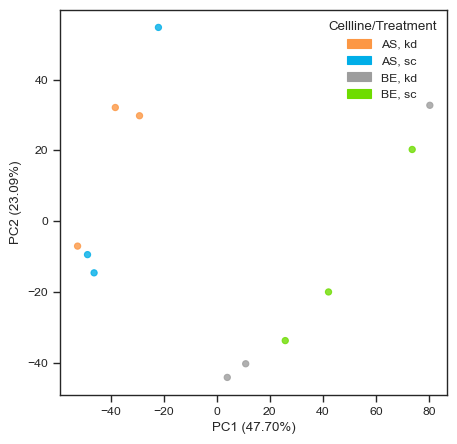

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))
ax, pca = scplt.plot_pca(ax, pdata_nb, classes=['cellline','treatment'])

In [ ]:
pdata_magic = pdata_nb.copy()
# set all nans to 0
pdata_magic.clean_X()

sc.external.pp.magic(pdata_magic.prot)

ℹ️ Backed up .X to .layers['X_preclean']
✅ Cleaned .X: replaced 3212 NaNs with 0.


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 16, n_samples_fit = 12, n_samples = 12

In [ ]:
sc.pp.scrublet(pdata_filter.prot, batch_key="test")

ValueError: Input contains NaN.

In [ ]:
# pdata_nb.prot.obs
pdata_nb.prot.obs

,sample,cellline,treatment,protein_quant,protein_count,protein_abundance_sum,mbr_count,high_count
F4,Sample,AS,kd,0.947474,4726,6.543988e+10,1322,3410
F8,Sample,AS,kd,0.941660,4697,5.114338e+10,1519,3174
F12,Sample,AS,kd,0.939655,4687,5.662568e+10,1396,3293
F2,Sample,AS,sc,0.936447,4671,5.097928e+10,1565,3105
F6,Sample,AS,sc,0.946472,4721,5.664297e+10,1565,3157
F10,Sample,AS,sc,0.944066,4709,6.136897e+10,1392,3323
F3,Sample,BE,kd,0.948677,4732,5.836572e+10,1352,3385
F7,Sample,BE,kd,0.947073,4724,5.590369e+10,1317,3414
F11,Sample,BE,kd,0.949278,4735,8.650390e+10,1202,3553
F1,Sample,BE,sc,0.951083,4744,7.587834e+10,1329,3424


In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")